In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [78]:
dataset = pd.read_csv(r'.\titanic-train.csv')

In [79]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [81]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [82]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,32.699854,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.346821,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,45.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
labelencoder = preprocessing.LabelEncoder()
dataset["Sex"] = labelencoder.fit_transform(dataset["Sex"])
dataset["Embarked"] = labelencoder.fit_transform(dataset["Embarked"])
labelencoder.classes_

array(['C', 'Q', 'S'], dtype=object)

In [84]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [85]:
X=dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [86]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [87]:
def svm_function(X_train, X_test, y_train, y_test):
    clf = svm.SVC(gamma = 0.1,C=100)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return y_test, y_pred


In [88]:
def Conf_Matrix(test,pred,label_values):
    print("Accuracy score for target '",col,"' is",round((accuracy_score(test,pred,normalize=True)*100),2),"%")
    cm = confusion_matrix(test,pred,label_values)
    sns.heatmap(cm, annot=True,fmt='d',xticklabels=label_values, yticklabels=label_values)
    plt.title('Confusion matrix of the classifier: '+col)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Generating the SVM Model for column: Survived 

Accuracy score for target ' Survived ' is 71.54 %


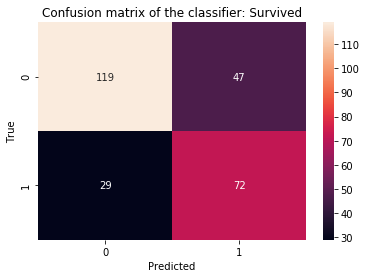


Generating the SVM Model for column: Pclass 

Accuracy score for target ' Pclass ' is 87.27 %


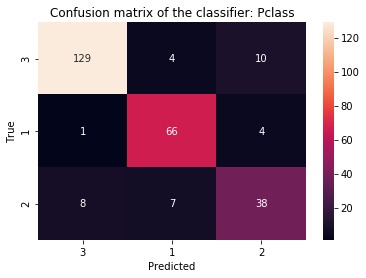


Generating the SVM Model for column: Sex 

Accuracy score for target ' Sex ' is 66.29 %


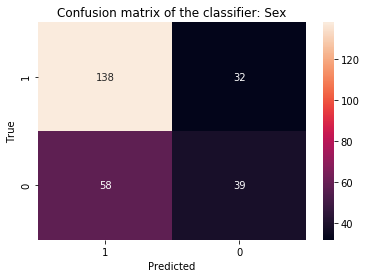


Generating the SVM Model for column: Age 

Accuracy score for target ' Age ' is 86.52 %


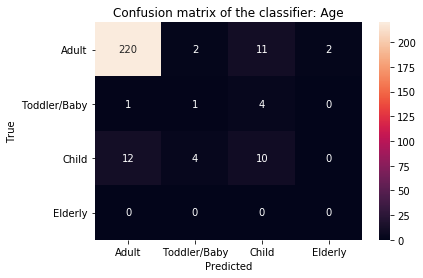


Generating the SVM Model for column: SibSp 

Accuracy score for target ' SibSp ' is 76.4 %


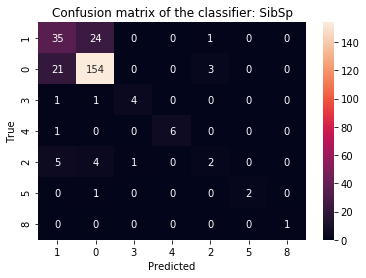


Generating the SVM Model for column: Parch 

Accuracy score for target ' Parch ' is 79.03 %


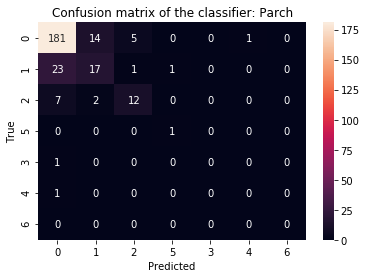


Generating the SVM Model for column: Fare 

Accuracy score for target ' Fare ' is 86.89 %


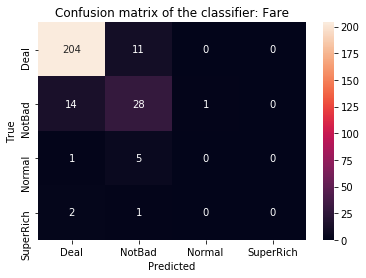


Generating the SVM Model for column: Embarked 

Accuracy score for target ' Embarked ' is 67.42 %


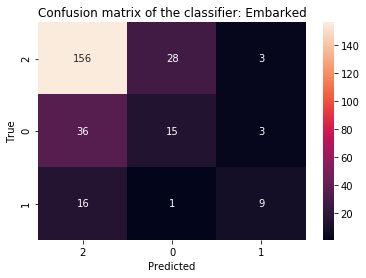

In [89]:
for col in X.columns:
    print("Generating the SVM Model for column:",col,"\n")
    X=X.drop([col],axis=1)
    if col == "Age":
        y=pd.cut(dataset["Age"],bins=[0,2,17,65,99],labels=['Toddler/Baby','Child','Adult','Elderly'])
    elif col == "Fare":
        y=pd.cut(pd.to_numeric(dataset["Fare"]),bins=[-10000,50,200,400,99999],labels=['Deal','NotBad','Normal','SuperRich'])
    else:
        y = dataset[col]
    #y = dataset[col]
    labels=list(y.unique())
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)
    y_test, y_pred = svm_function(X_train, X_test, y_train, y_test)
    Conf_Matrix(y_test,y_pred,labels)
    print("\n"+"===================================================================")
    X=dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

    